In [1]:
!pip install pandas
import sympy as sym
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

sym.init_printing()
sym.__version__


'1.4'

## Correlación


La correlación entre las señales $f(t)$ y $g(t)$ es una operación que indica cuán parecidas son las dos señales entre sí.

\begin{equation}
(f \; \circ \; g)(\tau) = h(\tau) = \int_{-\infty}^{\infty} f(t) \cdot g(t + \tau) \; dt
\end{equation}

Observe que la correlación y la convolución tienen estructura similares.

\begin{equation}
f(t) * g(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t - \tau) \; d\tau
\end{equation}

## Señales periódicas

La señal $y(t)$ es periódica si cumple con la condición $y(t+nT)=y(t)$ para todo $n$ entero. En este caso, $T$ es el periodo de la señal.
 
![SENO](figuras/grafica_seno.PNG)

La señal seno es la oscilación más pura que se puede expresar matemáticamente. Esta señal surge al considerar la proyección de un movimiento circular uniforme.



## Serie de Fourier


Si se combinan apropiadamente un conjunto de oscilaciones puras, como combinaciones lineales de señales desplazadas y escaladas en tiempo y amplitud, podría recrearse cualquiér señal periódica. Esta idea da lugar a las series de Fourier.

\begin{equation}
y(t) = \sum_{n=0}^{\infty} C_n \cdot cos(n \omega_0 t - \phi_n)
\end{equation}

La señal $y(t)$ es igual a una combinación de infinitas señales coseno, cada una con una amplitud $C_n$, una frecuencia $n \omega_0$ y un desfase $\phi_n$.


También puede expresarse como:

\begin{equation}
y(t) = \sum_{n=0}^{\infty} A_n \cdot cos(n \omega_0 t) + B_n \cdot sin(n \omega_0 t)  
\end{equation}

La serie queda definida si se encuentran los valores apropiados de $A_n$ y $B_n$ para todos los valores de $n$.

Observe que:
- $A_n$ debe ser más grande si $y(t)$ se "parece" más a un cos.
- $B_n$ debe ser más grande si $y(t)$ se "parece" más a un sin.

\begin{equation}
y(t) = \sum_{n=0}^{\infty} A_n \cdot cos(n \omega_0 t) + B_n \cdot sin(n \omega_0 t)  
\end{equation}

\begin{equation}
(f \; \circ \; g)(\tau) = \int_{-\infty}^{\infty} f(t) \cdot g(t + \tau) \; dt
\end{equation}

\begin{equation}
(y \; \circ \; sin_n)(\tau) = \int_{-\infty}^{\infty} y(t) \cdot sin(n \omega_0(t + \tau)) \; dt
\end{equation}



Considerando:
- $\tau=0$ para no incluir desfases.
- la señal $y(t)$ es periódica con periodo $T$.

\begin{equation}
(y \; \circ \; sin_n)(0) = \frac{1}{T} \int_{0}^{T} y(t) \cdot sin(n \omega_0 t) \; dt
\end{equation}

Esta expresión puede interpretarse como el parecido de una señal $y(t)$ a la señal $sin$ con crecuencia $n \omega_0$ promediado a lo largo de un periodo sin desfase del seno.

Retomando la idea inicial

\begin{equation}
y(t) = \sum_{n=0}^{\infty} A_n \cdot cos(n \omega_0 t) + B_n \cdot sin(n \omega_0 t)  
\end{equation}

donde
\begin{equation}
A_n = \frac{1}{T} \int_{0}^{T} y(t) \cdot cos(n \omega_0 t) \; dt
\end{equation}

\begin{equation}
B_n = \frac{1}{T} \int_{0}^{T} y(t) \cdot sin(n \omega_0 t) \; dt
\end{equation}

Se recomienda al estudiante que encuentre la relación entre las Series anteriores y la siguiente alternativa para representar la Series de Fourier.

\begin{equation}
y(t) = \sum_{n=-\infty}^{\infty} C_n \cdot e^{j n \omega_0 t}
\end{equation}

donde 

\begin{equation}
C_n = \frac{1}{T} \int_{0}^{T} y(t) \cdot e^{j n \omega_0 t} \; dt
\end{equation}

Los valores $C_n$ son el espectro de la señal periódica $y(t)$ y son una representación en el dominio de la frecuencia.

**Ejemplo # 1**

La señal $y(t) = sin(2 \pi t)$ es en sí misma una oscilación pura de periodo $T=1$. 

In [31]:
# Se define y como el seno de t
t = sym.symbols('t', real=True)
#T = sym.symbols('T', real=True)
T = 1
nw = sym.symbols('n', real=True)
delta = sym.DiracDelta(nw)
w0 = 2 * sym.pi / T

y = t**2
#vy = 4*sym.sin(w0*t + 0.5) - 10
# y = sym.sin(w0*t)
# y = (t-0.5)*(t-0.5)
y


Aunque la sumatoria de las series de Fourier incluye infinitos términos, solamente se tomaran las primeras 3 componentes.

In [37]:
n_max = 1

y_ser = 0
C = 0
ns = range(-n_max,n_max+1)
espectro = pd.DataFrame(index = ns,
                        columns= ['C','C_np','C_real','C_imag','C_mag','C_ang'])

for n in espectro.index:
    C_n = (1/T)*sym.integrate(y*sym.exp(-1j*n*w0*t), (t,0,T)).evalf()
    C = C + C_n*delta.subs(nw,nw-n)
    y_ser = y_ser + C_n*sym.exp(1j*n*w0*t)
    espectro['C'][n]=C_n
    C_r = float(sym.re(C_n))
    C_i = float(sym.im(C_n))
    espectro['C_real'][n] = C_r
    espectro['C_imag'][n] = C_i
    espectro['C_np'][n] = complex(C_r + 1j*C_i)
    espectro['C_mag'][n] = np.absolute(espectro['C_np'][n])
    espectro['C_ang'][n] = np.angle(espectro['C_np'][n])
espectro

,C,C_np,C_real,C_imag,C_mag,C_ang
-1,0.0506605918211689 - 0.159154943091895*I,(0.05066059182116889-0.15915494309189535j),0.0506606,-0.159155,0.167023,-1.26263
0,0.333333333333333,(0.3333333333333333+0j),0.333333,0,0.333333,0
1,0.0506605918211689 + 0.159154943091895*I,(0.05066059182116889+0.15915494309189535j),0.0506606,0.159155,0.167023,1.26263


La señal reconstruida con un **n_max** componentes

In [38]:
y_ser

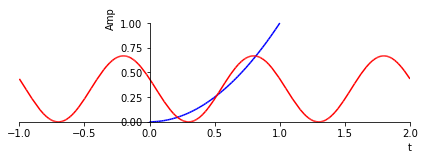

In [39]:
plt.rcParams['figure.figsize'] = 7, 2
#g1 = sym.plot(y, (t,0,1), ylabel=r'Amp',show=False,line_color='blue',legend=True, label = 'y(t) original')
#g2 = sym.plot(sym.re(y_ser), (t,-1,2), ylabel=r'Amp',show=False,line_color='red',legend=True, label = 'y(t) reconstruida')
g1 = sym.plot(y, (t,0,1), ylabel=r'Amp',show=False,line_color='blue')
g2 = sym.plot(sym.re(y_ser), (t,-1,2), ylabel=r'Amp',show=False,line_color='red')

g1.extend(g2)
g1.show()

In [40]:
C

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

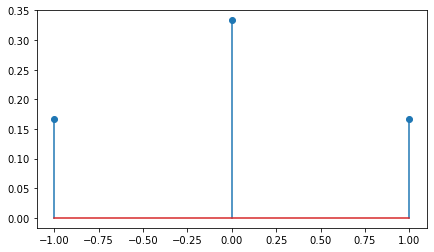

In [41]:
plt.rcParams['figure.figsize'] = 7, 4
plt.stem(espectro.index,espectro['C_mag'])


**Ejercicio**

Use las siguientes funciones para definir un periodo de una señal periódica con periodo $T=1$:

\begin{equation}
y_1(t) = \begin{cases}
-1 &  0 \leq t < 0.5 \\
1 &  0.5 \leq t < 1 
\end{cases}
\end{equation}


\begin{equation}
y_2(t) = t
\end{equation}

\begin{equation}
y_3(t) = 3 sin(2 \pi t)
\end{equation}

Varíe la cantidad de componentes que reconstruyen cada función y analice la reconstrucción obtenida y los valores de $C_n$